# Fitting Spatial Extension of IC443

This tutorial demonstrates how to perform a measurement of spatial extension with the [extension](http://fermipy.readthedocs.org/en/latest/advanced/extension.html) method in the [fermipy](http://fermipy.readthedocs.org) package.  This tutorial assumes that you have first gone through the [PG 1553](pg1553.ipynb) analysis tutorial.

## Get the Data and Setup the Analysis

In [23]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from fermipy.gtanalysis import GTAnalysis
from fermipy.plotting import ROIPlotter

In this thread we will use a pregenerated data set which is contained in a tar archive in the *data* directory of the *fermipy-extra* repository.

In [24]:
if os.path.isfile('../data/ic443.tar.gz'):
    !tar xzf ../data/ic443.tar.gz
else:
    !curl -OL https://raw.githubusercontent.com/fermiPy/fermipy-extras/master/data/ic443.tar.gz
    !tar xzf ic443.tar.gz

We first instantiate a GTAnalysis instance using the config file in the ic443 directory and the run the setup() method.  This will prepare all of the ancillary files and create the pylikelihood instance for binned analysis.  Note that in this example these files have already been generated so the routines that will normally be executed to create these files will be skipped.

In [25]:
gta = GTAnalysis('ic443/config.yaml')
matplotlib.interactive(True)
gta.setup()

2024-04-04 15:22:40 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version 1.2.2+36.g0aeb 
ScienceTools version 2.2.0


{'Prefactor': 0, 'Index1': 1, 'Scale': 2, 'Cutoff': 3, 'Index2': 4}


{'Prefactor': 0, 'Index1': 1, 'Scale': 2, 'Cutoff': 3, 'Index2': 4}


2024-04-04 15:22:41 INFO    GTAnalysis.setup(): Running setup.
2024-04-04 15:22:41 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2024-04-04 15:22:41 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2024-04-04 15:22:41 INFO    GTBinnedAnalysis.setup(): Using external LT cube.
2024-04-04 15:22:42 INFO    GTBinnedAnalysis._create_expcube(): Skipping gtexpcube.
Set MJD-OBS to 54682.655283 from DATE-OBS.
Set MJD-END to 56874.155220 from DATE-END'. [astropy.wcs.wcs]
2024-04-04 15:22:42 INFO    GTBinnedAnalysis._create_srcmaps(): Skipping gtsrcmaps.
2024-04-04 15:22:42 INFO    GTBinnedAnalysis.setup(): Finished setup for component 00
2024-04-04 15:22:42 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2024-04-04 15:22:48 INFO    GTAnalysis.setup(): Initializing source properties
2024-04-04 15:22:48 INFO    GTAnalysis.setup(): Finished setup.


Due to some issues with the large-file storage on github, some of the data files may be corrupted, giving the error:

`RuntimeError: File not in FITS format: /path/to/fermipy/environment/lib/python3.9/site-packages/fermipy/data/catalogs/Extended_archive_v15/Templates/IC443.fits`

To fix, download the extended templates directly from the FSSC website ( https://fermi.gsfc.nasa.gov/ssc/data/access/lat/4yr_catalog/LAT_extended_sources_v15.tgz ) and replace the `Extended_archive_v15` directory.

Note that those files are for the 3FGL catalog, not the latest 4FGL-DR4 (14 yrs of data):
https://fermi.gsfc.nasa.gov/ssc/data/access/lat/14yr_catalog/

## Print the ROI model

We can print the ROI object to see a list of sources in the model along with their distance from the ROI center (offset), TS, and number of predicted counts (Npred).  Since we haven't yet fit any sources, the ts of all sources will initially be set to nan.

In [26]:
gta.print_roi()

2024-04-04 15:22:58 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
3FGL J0617.2+2234e  SpatialMap     LogParabola       0.000       nan     11302.5
3FGL J0619.4+2242   PointSource    PowerLaw          0.536       nan       248.8
3FGL J0609.3+2131   PointSource    LogParabola       2.105       nan       356.0
3FGL J0609.2+2051c  PointSource    PowerLaw          2.524       nan       165.1
3FGL J0621.0+2514   PointSource    PowerLaw          2.804       nan       172.9
3FGL J0611.5+1957   PointSource    PowerLaw          2.931       nan       204.8
3FGL J0603.8+2155   PointSource    PowerLaw          3.166       nan        64.1
3FGL J0628.4+2429   PointSource    PowerLaw          3.214       nan        15.5
3FGL J0605.9+2039c  PointSource    PowerLaw          3.263       nan        38.6
3FGL J0601.5+2309   PointSource    PowerLaw          3.6

Now we will run the optimize() method.  This method refits the spectral parameters of all sources in the ROI and gives us baseline model that we can use as a starting point for fitting the spatial extension.

In [27]:
gta.optimize()

2024-04-04 15:22:59 INFO    GTAnalysis.optimize(): Starting


Joint fit  ['galdiff', '3FGL J0617.2+2234e', 'isodiff']


/Users/omodei/miniconda3/envs/fermipy-test/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:313: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


Fitting shape galdiff TS:  33535.803
Fitting shape 3FGL J0617.2+2234e TS:  29642.155
Fitting shape 3FGL J0621.0+2514 TS:     79.813
Fitting shape isodiff TS:     53.457
Fitting shape 3FGL J0609.3+2131 TS:     50.709
Fitting shape 3FGL J0619.4+2242 TS:     41.671
Fitting shape 3FGL J0603.8+2155 TS:     39.543
Fitting shape 3FGL J0609.2+2051c TS:     33.916


2024-04-04 15:23:10 INFO    GTAnalysis.optimize(): Finished
2024-04-04 15:23:10 INFO    GTAnalysis.optimize(): LogLike: -48968.111280 Delta-LogLike: 77.470487
2024-04-04 15:23:10 INFO    GTAnalysis.optimize(): Execution time: 10.67 s


{'loglike0': -49045.58176731196,
 'loglike1': -48968.111279837365,
 'dloglike': 77.47048747459485,
 'config': {'npred_threshold': 1.0,
  'npred_frac': 0.95,
  'shape_ts_threshold': 25.0,
  'max_free_sources': 5,
  'skip': [],
  'optimizer': {'optimizer': 'MINUIT',
   'tol': 0.001,
   'max_iter': 100,
   'init_lambda': 0.0001,
   'retries': 3,
   'min_fit_quality': 2,
   'verbosity': 0}}}

In [28]:
gta.print_roi()

2024-04-04 15:23:10 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
3FGL J0617.2+2234e  SpatialMap     LogParabola       0.000  34250.99     10889.9
3FGL J0619.4+2242   PointSource    PowerLaw          0.536     49.01       286.3
3FGL J0609.3+2131   PointSource    LogParabola       2.105     47.84       201.2
3FGL J0609.2+2051c  PointSource    PowerLaw          2.524     29.95       145.2
3FGL J0621.0+2514   PointSource    PowerLaw          2.804     82.26       153.8
3FGL J0611.5+1957   PointSource    PowerLaw          2.931     16.81        78.9
3FGL J0603.8+2155   PointSource    PowerLaw          3.166     38.34        59.2
3FGL J0628.4+2429   PointSource    PowerLaw          3.214      1.01        14.2
3FGL J0605.9+2039c  PointSource    PowerLaw          3.263     21.41       127.2
3FGL J0601.5+2309   PointSource    PowerLaw          3.6

To check the quality of the ROI model fit we can generate a residual map with the residmap method.  This will produce smoothed maps of the counts distribution and residuals (counts-model) using a given spatial kernel.  The spatial kernel can be defined with a source dictionary.  In the following example we use a PointSource with a PowerLaw index of 2.0.

In [29]:
resid = gta.residmap('ic443_roifit',model={'SpatialModel' : 'PointSource', 'Index' : 2.0})

2024-04-04 15:23:10 INFO    GTAnalysis.residmap(): Generating residual maps
2024-04-04 15:23:10 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2024-04-04 15:23:12 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2024-04-04 15:23:12 INFO    GTAnalysis.residmap(): Finished residual maps
2024-04-04 15:23:20 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/fermipy-extra/notebooks/ic443/ic443_roifit_pointsource_powerlaw_2.00_residmap.npy
2024-04-04 15:23:20 INFO    GTAnalysis.residmap(): Execution time: 10.36 s


Text(0.5, 1.0, 'Excess Counts')

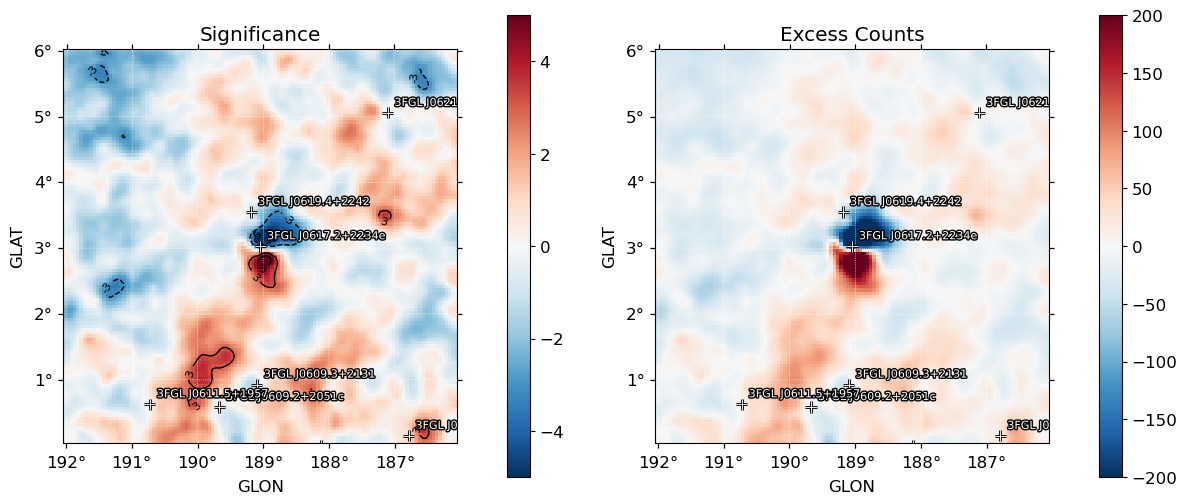

In [30]:
o = resid
fig = plt.figure(figsize=(14,6))
ROIPlotter(o['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5,7,9],subplot=121,cmap='RdBu_r')
plt.gca().set_title('Significance')
ROIPlotter(o['excess'],roi=gta.roi).plot(vmin=-200,vmax=200,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess Counts')

We can see the effect of removing sources from the model by running *residmap* with the *exclude* option.  Here we generate a residual map with the source 3FGL J0621.0+2514 removed from the model.

In [31]:
resid_noj0621 = gta.residmap('ic443_roifit_noj0621',
                model={'SpatialModel' : 'PointSource', 'Index' : 2.0},
                exclude=['3FGL J0621.0+2514'])

2024-04-04 15:23:22 INFO    GTAnalysis.residmap(): Generating residual maps
2024-04-04 15:23:22 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2024-04-04 15:23:23 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2024-04-04 15:23:23 INFO    GTAnalysis.residmap(): Finished residual maps
2024-04-04 15:23:30 WARNING GTAnalysis.residmap(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/fermipy-extra/notebooks/ic443/ic443_roifit_noj0621_pointsource_powerlaw_2.00_residmap.npy
2024-04-04 15:23:30 INFO    GTAnalysis.residmap(): Execution time: 8.65 s


Text(0.5, 1.0, 'Excess Counts')

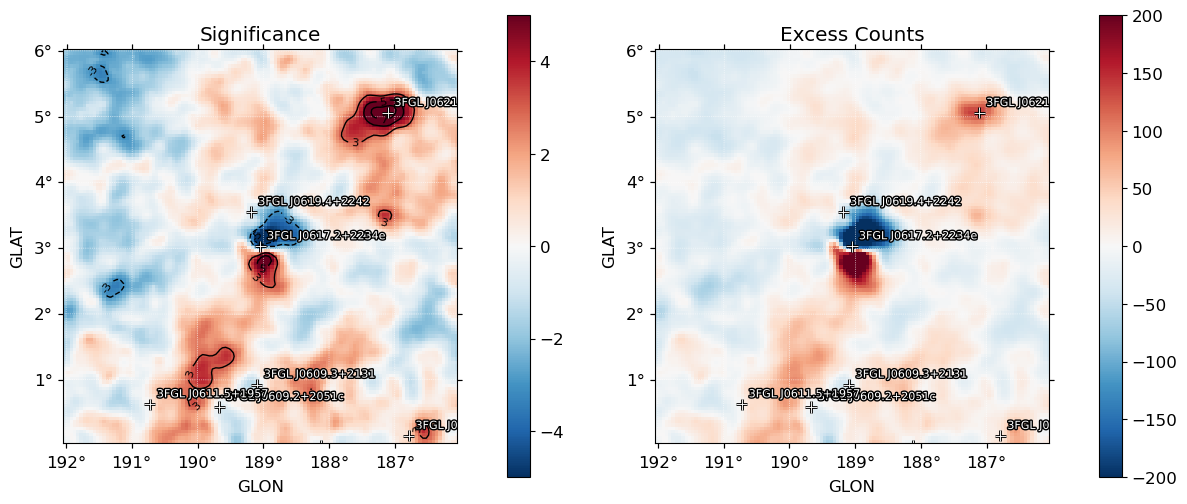

In [32]:
o = resid_noj0621
fig = plt.figure(figsize=(14,6))
ROIPlotter(o['sigma'],roi=gta.roi).plot(vmin=-5,vmax=5,levels=[-5,-3,3,5,7,9],subplot=121,cmap='RdBu_r')
plt.gca().set_title('Significance')
ROIPlotter(o['excess'],roi=gta.roi).plot(vmin=-200,vmax=200,subplot=122,cmap='RdBu_r')
plt.gca().set_title('Excess Counts')

We can get alternative assessment of the model by generating a TS map of the region.  Again we see a hotspot at the position of 3FGL J0621.0+2514 which we excluded from the model.

In [33]:
tsmap_noj0621 = gta.tsmap('ic443_noj0621',
                model={'SpatialModel' : 'PointSource', 'Index' : 2.0},
                exclude=['3FGL J0621.0+2514'])

2024-04-04 15:23:31 INFO    GTAnalysis.tsmap(): Generating TS map
2024-04-04 15:23:32 INFO    GTAnalysis._make_tsmap_fast(): Fitting test source.
2024-04-04 15:23:44 INFO    GTAnalysis.tsmap(): Finished TS map
2024-04-04 15:23:51 WARNING GTAnalysis.tsmap(): Saving TS maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/fermipy-extra/notebooks/ic443/ic443_noj0621_pointsource_powerlaw_2.00_tsmap.npy
2024-04-04 15:23:51 INFO    GTAnalysis.tsmap(): Execution time: 19.68 s


Text(0.5, 1.0, 'sqrt(TS)')

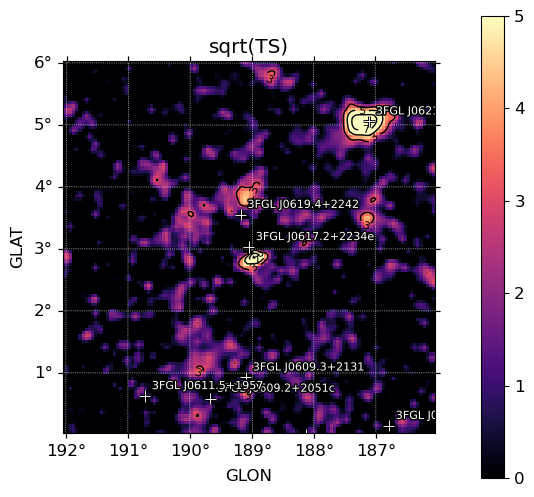

In [34]:
o = tsmap_noj0621

fig = plt.figure(figsize=(6,6))
ROIPlotter(o['sqrt_ts'],roi=gta.roi).plot(vmin=0,vmax=5,levels=[3,5,7,9],subplot=111,cmap='magma')
plt.gca().set_title('sqrt(TS)')

## Measuring Source Extension

After optimizing the model we are ready to run an extension analysis on IC 443.  As reported in [Abdo et al. 2010](http://adsabs.harvard.edu/cgi-bin/bib_query?arXiv:1002.2198), this source has a spatial extension of 0.27 deg $\pm$ 0.01 (stat).  We can run an extension test of this source by calling the *extension* method with the source name.  The extension method has a number of options which can be changed at runtime by passing keyword arguments.  To see the default settings we can look at the extension sub-dictionary of the config property of our GTAnalysis instance.

In [35]:
import pprint
pprint.pprint(gta.config['extension'])

{'fit_ebin': False,
 'fit_position': False,
 'fix_shape': False,
 'free_background': False,
 'free_radius': None,
 'make_plots': False,
 'make_tsmap': True,
 'psf_scale_fn': None,
 'reoptimize': False,
 'save_model_map': False,
 'spatial_model': 'RadialGaussian',
 'sqrt_ts_threshold': None,
 'tsmap_fitter': 'tsmap',
 'update': False,
 'width': [],
 'width_max': 1.0,
 'width_min': 0.00316,
 'width_nstep': 26,
 'write_fits': True,
 'write_npy': True}


By default the method will use a 2D Gaussian source template and scan the width parameter between 0.00316 and 1 degrees in 26 steps.  The *width* parameter can be used to provide an explicit  vector of points for the scan.  Since we know the extension of IC 443 is well localized around 0.27 deg we use a width vector centered around this point.  The analysis results are returned as an output dictionary and are also written to the internal source object of the GTAnalysis instance.

In [36]:
ext_gauss = gta.extension('3FGL J0617.2+2234e',width=np.linspace(0.25,0.30,11).tolist())
gta.write_roi('ext_gauss_fit')

2024-04-04 15:23:53 INFO    GTAnalysis.extension(): Running extension fit for 3FGL J0617.2+2234e
2024-04-04 15:24:04 INFO    GTAnalysis._extension(): Fitting extended-source model.
2024-04-04 15:24:07 INFO    GTAnalysis._extension(): Generating TS map.
2024-04-04 15:24:09 INFO    GTAnalysis._extension(): Testing point-source model.
2024-04-04 15:24:28 INFO    GTAnalysis._extension(): Best-fit extension: 0.2734 + 0.0048 - 0.0036
2024-04-04 15:24:28 INFO    GTAnalysis._extension(): TS_ext:        4101.660
2024-04-04 15:24:28 INFO    GTAnalysis._extension(): Extension UL: 0.2813
2024-04-04 15:24:28 INFO    GTAnalysis._extension(): LogLike:   -48957.552 DeltaLogLike:       10.559
2024-04-04 15:24:28 INFO    GTAnalysis.extension(): Finished extension fit.


{'spatial_model': 'RadialGaussian', 'width': [0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.27999999999999997, 0.285, 0.29, 0.295, 0.3], 'fit_position': False, 'width_min': 0.00316, 'width_max': 1.0, 'width_nstep': 26, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialGaussian', 'width': [0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.27999999999999997, 0.285, 0.29, 0.295, 0.3], 'fit_position': False, 'width_min': 0.00316, 'width_max': 1.0, 'width_nstep': 26, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin'

2024-04-04 15:24:32 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/fermipy-extra/notebooks/ic443/3fgl_j0617.2+2234e_ext.npy
2024-04-04 15:24:32 INFO    GTAnalysis.extension(): Execution time: 39.11 s
2024-04-04 15:24:32 INFO    GTBinnedAnalysis.write_xml(): Writing /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/fermipy-extra/notebooks/ic443/ext_gauss_fit_00.xml...
2024-04-04 15:24:32 INFO    GTAnalysis.write_fits(): Writing /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/fermipy-extra/notebooks/ic443/ext_gauss_fit.fits...
WARNING

{'name': '3FGL J0617.2+2234e', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.27999999999999997, 0.285, 0.29, 0.295, 0.3], 'fit_position': False, 'width_min': 0.00316, 'width_max': 1.0, 'width_nstep': 26, 'free_background': False, 'fix_shape': False, 'free_radius': None, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.   , 0.25 , 0.255, 0.26 , 0.265, 0.27 , 0.275, 0.28 , 0.285,
       0.29 , 0.295, 0.3  ]), 'dloglike': array([8.94328679e-01, 2.02784853e+03, 2.03616736e+03, 2.04228124e+03,
       2.04734446e+03, 2.05033555e+03, 2.05

: Format %s cannot be mapped to the accepted TDISPn keyword values.  Format will not be moved into TDISPn keyword. [astropy.io.fits.column]
2024-04-04 15:24:46 INFO    GTAnalysis.write_roi(): Writing /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/fermipy-extra/notebooks/ic443/ext_gauss_fit.npy...


To inspect the results of the analysis we can make a plot of the likelihood profile.  From this we can see that the spatial extension is in good agreement with the value from Abdo et al. 2010.  

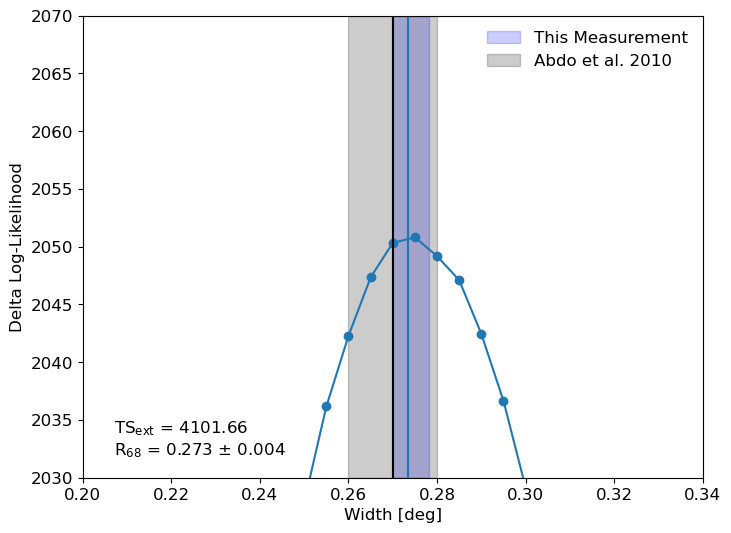

In [37]:
plt.figure(figsize=(8,6))
plt.plot(ext_gauss['width'],ext_gauss['dloglike'],marker='o')
plt.gca().set_xlabel('Width [deg]')
plt.gca().set_ylabel('Delta Log-Likelihood')
plt.gca().axvline(ext_gauss['ext'])
plt.gca().axvspan(ext_gauss['ext']-ext_gauss['ext_err_lo'],ext_gauss['ext']+ext_gauss['ext_err_hi'],
                      alpha=0.2,label='This Measurement',color='b')

plt.gca().axvline(0.27,color='k')
plt.gca().axvspan(0.27-0.01,0.27+0.01,alpha=0.2,label='Abdo et al. 2010',color='k')
plt.gca().set_ylim(2030,2070)
plt.gca().set_xlim(0.20,0.34)

plt.annotate('TS$_{\mathrm{ext}}$ = %.2f\nR$_{68}$ = %.3f $\pm$ %.3f'%
            (ext_gauss['ts_ext'],ext_gauss['ext'],ext_gauss['ext_err']),xy=(0.05,0.05),xycoords='axes fraction')
plt.gca().legend(frameon=False)

As an additional cross-check we can look at what happens when we free sources and rerun the extension analysis.

In [38]:
ext_gauss_free = gta.extension('3FGL J0617.2+2234e',width=np.linspace(0.25,0.30,11).tolist(),free_radius=1.0)
print ('Fixed Sources: %f +/- %f'%(ext_gauss['ext'],ext_gauss['ext_err']))
print ('Free Sources:  %f +/- %f'%(ext_gauss_free['ext'],ext_gauss_free['ext_err']))

2024-04-04 15:24:47 INFO    GTAnalysis.extension(): Running extension fit for 3FGL J0617.2+2234e
2024-04-04 15:24:59 INFO    GTAnalysis._extension(): Fitting extended-source model.
2024-04-04 15:25:04 INFO    GTAnalysis._extension(): Generating TS map.
2024-04-04 15:25:06 INFO    GTAnalysis._extension(): Testing point-source model.
2024-04-04 15:25:24 INFO    GTAnalysis._extension(): Best-fit extension: 0.2724 + 0.0045 - 0.0034
2024-04-04 15:25:24 INFO    GTAnalysis._extension(): TS_ext:        3919.427
2024-04-04 15:25:24 INFO    GTAnalysis._extension(): Extension UL: 0.2798
2024-04-04 15:25:24 INFO    GTAnalysis._extension(): LogLike:   -48958.441 DeltaLogLike:       22.519
2024-04-04 15:25:24 INFO    GTAnalysis.extension(): Finished extension fit.


{'spatial_model': 'RadialGaussian', 'width': [0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.27999999999999997, 0.285, 0.29, 0.295, 0.3], 'fit_position': False, 'width_min': 0.00316, 'width_max': 1.0, 'width_nstep': 26, 'free_background': False, 'fix_shape': False, 'free_radius': 1.0, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}
{'spatial_model': 'RadialGaussian', 'width': [0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.27999999999999997, 0.285, 0.29, 0.295, 0.3], 'fit_position': False, 'width_min': 0.00316, 'width_max': 1.0, 'width_nstep': 26, 'free_background': False, 'fix_shape': False, 'free_radius': 1.0, 'fit_ebin': 

2024-04-04 15:25:27 WARNING GTAnalysis.extension(): Saving maps in .npy files is disabled b/c of incompatibilities in python3, remove the maps from the /Users/omodei/GRBWorkDir/MY_PYTHON_MODULES/gitrepository/fermipy-extra/notebooks/ic443/3fgl_j0617.2+2234e_ext.npy
2024-04-04 15:25:27 INFO    GTAnalysis.extension(): Execution time: 40.59 s


{'name': '3FGL J0617.2+2234e', 'file': None, 'config': {'spatial_model': 'RadialGaussian', 'width': [0.25, 0.255, 0.26, 0.265, 0.27, 0.275, 0.27999999999999997, 0.285, 0.29, 0.295, 0.3], 'fit_position': False, 'width_min': 0.00316, 'width_max': 1.0, 'width_nstep': 26, 'free_background': False, 'fix_shape': False, 'free_radius': 1.0, 'fit_ebin': False, 'update': False, 'save_model_map': False, 'sqrt_ts_threshold': None, 'psf_scale_fn': None, 'make_tsmap': True, 'tsmap_fitter': 'tsmap', 'make_plots': False, 'write_fits': True, 'write_npy': True, 'reoptimize': False, 'optimizer': {'optimizer': 'MINUIT', 'tol': 0.001, 'max_iter': 100, 'init_lambda': 0.0001, 'retries': 3, 'min_fit_quality': 2, 'verbosity': 0}, 'prefix': '', 'outfile': None, 'loge_bins': []}, 'width': array([0.   , 0.25 , 0.255, 0.26 , 0.265, 0.27 , 0.275, 0.28 , 0.285,
       0.29 , 0.295, 0.3  ]), 'dloglike': array([8.66929639e-01, 1.94007321e+03, 1.94747173e+03, 1.95277362e+03,
       1.95713076e+03, 1.95954110e+03, 1.959